In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from IPython.display import display

In [72]:
sales_data = "data/transactions.csv"
sales_df = pd.read_csv(sales_data, sep=';', low_memory=False)
#pd.set_option('display.max_columns', None)
print(display(sales_df))

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,13-7700-2022,02/06/2022 16:18,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.80,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.0,0.0,NaN,DAMAC HILLS (2) - ODORA
1,13-7699-2022,02/06/2022 16:14,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.80,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.0,0.0,NaN,DAMAC HILLS (2) - ZINNIA
2,14-563-2022,02/06/2022 15:42,280311,Mortgage,Modify Mortgage,Ready,Non Free Hold,Residential,Al Barshaa South First,Land,...,1188.42,NaN,NaN,Sharaf Dg Metro Station,Mall of the Emirates,Motor City,0.0,0.0,NaN,NaN
3,11-12317-2022,02/06/2022 15:22,79102731,Sales,Sale,Ready,Free Hold,Commercial,AL FURJAN,Land,...,600.51,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,11-12316-2022,02/06/2022 15:07,132952797,Sales,Sale,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,112.24,NaN,NaN,NaN,NaN,Dubai Cycling Course,1.0,1.0,NaN,DAMAC HILLS (2) - AMARGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995970,13-1699-1996,14/02/1996 00:00,256488,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Manara,Land,...,1393.55,NaN,NaN,First Abu Dhabi Bank Metro Station,Mall of the Emirates,Burj Al Arab,0.0,0.0,NaN,NaN
995971,13-1701-1996,24/01/1996 00:00,391611,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Satwa,Land,...,1390.01,NaN,NaN,Financial Centre,Dubai Mall,Burj Khalifa,0.0,0.0,NaN,NaN
995972,13-1742-1995,26/10/1995 00:00,216804,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Mezhar Second,Land,...,1858.06,NaN,NaN,Etisalat Metro Station,City Centre Mirdif,Dubai International Airport,0.0,0.0,NaN,NaN
995973,13-1746-1995,18/10/1995 00:00,536243421,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Goze First,Land,...,929.03,NaN,NaN,Business Bay Metro Station,Dubai Mall,Downtown Dubai,0.0,0.0,NaN,NaN


None


In [73]:
# - .strip() removing leading/trailing whitespcaes
# - .replace() replace spaces with underscores
# - .lower() convert all uppercase to lowercase


sales_df.columns = sales_df.columns.str.lower().str.strip().str.replace(' ', '_')

#
sales_df.head()

,transaction_number,transaction_date,property_id,transaction_type,transaction_sub_type,registration_type,is_free_hold?,usage,area,property_type,...,property_size_(sq.m),room(s),parking,nearest_metro,nearest_mall,nearest_landmark,no._of_buyer,no._of_seller,master_project,project
0,13-7700-2022,02/06/2022 16:18,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.80,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.0,0.0,NaN,DAMAC HILLS (2) - ODORA
1,13-7699-2022,02/06/2022 16:14,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.80,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.0,0.0,NaN,DAMAC HILLS (2) - ZINNIA
2,14-563-2022,02/06/2022 15:42,280311,Mortgage,Modify Mortgage,Ready,Non Free Hold,Residential,Al Barshaa South First,Land,...,1188.42,NaN,NaN,Sharaf Dg Metro Station,Mall of the Emirates,Motor City,0.0,0.0,NaN,NaN
3,11-12317-2022,02/06/2022 15:22,79102731,Sales,Sale,Ready,Free Hold,Commercial,AL FURJAN,Land,...,600.51,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,11-12316-2022,02/06/2022 15:07,132952797,Sales,Sale,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,112.24,NaN,NaN,NaN,NaN,Dubai Cycling Course,1.0,1.0,NaN,DAMAC HILLS (2) - AMARGO


In [74]:
#convert 'transaction_date' column to datetime format and remove time component
sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date'], errors='coerce').dt.date

print(sales_df.head())

  transaction_number transaction_date  property_id transaction_type  \
0       13-7700-2022       2022-02-06     44581083         Mortgage   
1       13-7699-2022       2022-02-06     44014284         Mortgage   
2        14-563-2022       2022-02-06       280311         Mortgage   
3      11-12317-2022       2022-02-06     79102731            Sales   
4      11-12316-2022       2022-02-06    132952797            Sales   

    transaction_sub_type registration_type  is_free_hold?        usage  \
0  Mortgage Registration             Ready      Free Hold  Residential   
1  Mortgage Registration             Ready      Free Hold  Residential   
2        Modify Mortgage             Ready  Non Free Hold  Residential   
3                   Sale             Ready      Free Hold   Commercial   
4                   Sale             Ready      Free Hold  Residential   

                     area property_type  ... property_size_(sq.m)  room(s)  \
0            AKOYA OXYGEN          Land  ...      

In [75]:
# dropping irrelevant columns except the selected once
 
col_df = [ 
    'property_type','room(s)', 'nearest_landmark', 'nearest_mall', 'nearest_metro', 
    'property_size_(sq.m)','usage', 'amount','area'
]

sales_df = sales_df.filter(items=col_df)

sales_df.head()

,property_type,room(s),nearest_landmark,nearest_mall,nearest_metro,property_size_(sq.m),usage,amount,area
0,Land,NaN,Dubai Cycling Course,NaN,NaN,174.80,Residential,570400.0,AKOYA OXYGEN
1,Land,NaN,Dubai Cycling Course,NaN,NaN,174.80,Residential,530000.0,AKOYA OXYGEN
2,Land,NaN,Motor City,Mall of the Emirates,Sharaf Dg Metro Station,1188.42,Residential,500000.0,Al Barshaa South First
3,Land,NaN,NaN,NaN,NaN,600.51,Commercial,1500000.0,AL FURJAN
4,Land,NaN,Dubai Cycling Course,NaN,NaN,112.24,Residential,815000.0,AKOYA OXYGEN


In [76]:
sales_df['usage'].unique()

array(['Residential', 'Commercial'], dtype=object)

In [77]:
# finding null values in each columns

sales_df.isnull().sum()

property_type                0
room(s)                 237817
nearest_landmark        103369
nearest_mall            220061
nearest_metro           216136
property_size_(sq.m)         3
usage                        0
amount                       0
area                         0
dtype: int64

In [78]:
#sales_df['usage'].unique()
sales_df['usage'].unique()


array(['Residential', 'Commercial'], dtype=object)

In [79]:
# #print(sales_df['usage'].isnull().sum())  # Check how many rows have missing 'usage'
# sales_df = sales_df[sales_df['usage'].isin(['commercial', 'residential'])]
# print(sales_df['usage'].unique())  # Ensure both categories exist

# Check the number of "Commercial" entries before dropping null values
print(sales_df[sales_df['usage'] == 'Commercial'].shape[0])


# Find rows where usage is 'Commercial' and check for NaN values in other columns
commercial_rows = sales_df[sales_df['usage'] == 'Commercial']
print(commercial_rows.isna().sum())  # Check NaNs in other columns for these rows


81431
property_type               0
room(s)                 81431
nearest_landmark         8478
nearest_mall            15774
nearest_metro           15316
property_size_(sq.m)        2
usage                       0
amount                      0
area                        0
dtype: int64


In [80]:

# Define the list of possible room types for commercial
room_types = ['Office', 'Shop', 'PENTHOUSE', 'GYM', 'Hotel']

# Fill NaN values in 'room(s)' with random selections from the list
sales_df['room(s)'] = sales_df['room(s)'].apply(lambda x: np.random.choice(room_types) if pd.isna(x) else x)


In [81]:
# drop the null value 

# sales_df = sales_df.dropna()

# Drop NaNs selectively from columns where you are sure NaNs shouldn't affect 'usage'
# sales_df = sales_df.dropna(subset=['room(s)', 'nearest_landmark', 'nearest_mall', 'nearest_metro', 'property_size_(sq.m)'])
sales_df = sales_df.dropna(subset=['nearest_landmark', 'nearest_mall', 'nearest_metro', 'property_size_(sq.m)'])


sales_df #.head()

,property_type,room(s),nearest_landmark,nearest_mall,nearest_metro,property_size_(sq.m),usage,amount,area
2,Land,PENTHOUSE,Motor City,Mall of the Emirates,Sharaf Dg Metro Station,1188.42,Residential,500000.0,Al Barshaa South First
5,Unit,Studio,Expo 2020 Site,Ibn-e-Battuta Mall,Ibn Battuta Metro Station,49.47,Residential,425993.0,AL FURJAN
7,Unit,2 B/R,Burj Al Arab,Marina Mall,Palm Jumeirah,167.94,Residential,805600.0,PALM JUMEIRAH
8,Unit,2 B/R,Burj Al Arab,Marina Mall,Palm Jumeirah,167.94,Residential,1900000.0,PALM JUMEIRAH
9,Unit,3 B/R,Burj Khalifa,Dubai Mall,Financial Centre,160.49,Residential,3500000.0,Zaabeel Second
...,...,...,...,...,...,...,...,...,...
995970,Land,Shop,Burj Al Arab,Mall of the Emirates,First Abu Dhabi Bank Metro Station,1393.55,Residential,500000.0,Al Manara
995971,Land,PENTHOUSE,Burj Khalifa,Dubai Mall,Financial Centre,1390.01,Residential,500000.0,Al Satwa
995972,Land,GYM,Dubai International Airport,City Centre Mirdif,Etisalat Metro Station,1858.06,Residential,500000.0,Al Mezhar Second
995973,Land,GYM,Downtown Dubai,Dubai Mall,Business Bay Metro Station,929.03,Residential,500000.0,Al Goze First


In [82]:
# Check for NaN values in important columns after cleaning
print(sales_df[['room(s)', 'nearest_landmark', 'nearest_mall', 'nearest_metro', 'property_size_(sq.m)', 'amount']].isna().sum())


room(s)                 0
nearest_landmark        0
nearest_mall            0
nearest_metro           0
property_size_(sq.m)    0
amount                  0
dtype: int64


In [83]:


print(sales_df[sales_df['usage'] == 'Commercial'].shape[0])


62133


In [84]:
sales_df.isnull().sum()

property_type           0
room(s)                 0
nearest_landmark        0
nearest_mall            0
nearest_metro           0
property_size_(sq.m)    0
usage                   0
amount                  0
area                    0
dtype: int64

In [85]:
sales_df.dtypes

property_type            object
room(s)                  object
nearest_landmark         object
nearest_mall             object
nearest_metro            object
property_size_(sq.m)    float64
usage                    object
amount                  float64
area                     object
dtype: object

In [86]:
#convert the amount data type to int and the date to datetime data type
sales_df['amount'] = sales_df['amount'].astype(int)
#sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date'])

columns_to_convert = ['property_type', 'room(s)', 'nearest_landmark', 'nearest_mall', 'nearest_metro', 'usage', 'area']

for column in columns_to_convert:
    sales_df[column] = sales_df[column].astype('category')

sales_df.dtypes

property_type           category
room(s)                 category
nearest_landmark        category
nearest_mall            category
nearest_metro           category
property_size_(sq.m)     float64
usage                   category
amount                     int64
area                    category
dtype: object

In [87]:
sales_df['usage'].unique()

['Residential', 'Commercial']
Categories (2, object): ['Commercial', 'Residential']

In [88]:
sales_df.describe()

,property_size_(sq.m),amount
count,7.223390e+05,7.223390e+05
mean,5.580435e+02,3.718400e+06
std,4.027155e+04,3.463111e+07
min,0.000000e+00,6.700000e+01
25%,7.440000e+01,7.093130e+05
50%,1.197700e+02,1.242000e+06
75%,2.339300e+02,2.316951e+06
max,1.950336e+07,8.100000e+09


In [89]:
# Filter out rows with property prices outside the specified range
# Minimum threshold: 400,000 USD
# Maximum threshold: 200 million USD

sales_df = sales_df[sales_df['amount'] >= 1500000] 
sales_df = sales_df[sales_df['amount'] <= 750000000] 

sales_df #.head()

,property_type,room(s),nearest_landmark,nearest_mall,nearest_metro,property_size_(sq.m),usage,amount,area
8,Unit,2 B/R,Burj Al Arab,Marina Mall,Palm Jumeirah,167.94,Residential,1900000,PALM JUMEIRAH
9,Unit,3 B/R,Burj Khalifa,Dubai Mall,Financial Centre,160.49,Residential,3500000,Zaabeel Second
14,Building,4 B/R,Expo 2020 Site,Ibn-e-Battuta Mall,Ibn Battuta Metro Station,784.50,Residential,2000000,DUBAI INVESTMENT PARK FIRST
15,Unit,2 B/R,Sports City Swimming Academy,Marina Mall,Nakheel Metro Station,258.12,Residential,3056216,JUMEIRAH VILLAGE CIRCLE
16,Land,GYM,Dubai International Airport,City Centre Mirdif,Rashidiya Metro Station,334.45,Residential,1600000,Al Rashidiya
...,...,...,...,...,...,...,...,...,...
995926,Land,PENTHOUSE,Dubai International Airport,City Centre Mirdif,Deira City Centre,3716.12,Commercial,22000000,Port Saeed
995942,Land,Office,Dubai International Airport,Dubai Mall,Deira City Centre,1871.35,Commercial,9446800,Port Saeed
995945,Land,GYM,Dubai International Airport,Dubai Mall,Burjuman Metro Station,1068.38,Commercial,4800000,Al Karama
995946,Land,Hotel,Dubai International Airport,Dubai Mall,Burjuman Metro Station,415.93,Commercial,4500000,Al Hamriya


In [90]:
# Filter property sizes within the range of 44.59 sq.m to 3901.93 sq.m

sales_df = sales_df[
    (sales_df['property_size_(sq.m)'] >= 44.59) &
    (sales_df['property_size_(sq.m)'] <= 3901.93)
]

sales_df = sales_df.reset_index(drop = True)
sales_df.head()

,property_type,room(s),nearest_landmark,nearest_mall,nearest_metro,property_size_(sq.m),usage,amount,area
0,Unit,2 B/R,Burj Al Arab,Marina Mall,Palm Jumeirah,167.94,Residential,1900000,PALM JUMEIRAH
1,Unit,3 B/R,Burj Khalifa,Dubai Mall,Financial Centre,160.49,Residential,3500000,Zaabeel Second
2,Building,4 B/R,Expo 2020 Site,Ibn-e-Battuta Mall,Ibn Battuta Metro Station,784.50,Residential,2000000,DUBAI INVESTMENT PARK FIRST
3,Unit,2 B/R,Sports City Swimming Academy,Marina Mall,Nakheel Metro Station,258.12,Residential,3056216,JUMEIRAH VILLAGE CIRCLE
4,Land,GYM,Dubai International Airport,City Centre Mirdif,Rashidiya Metro Station,334.45,Residential,1600000,Al Rashidiya


In [91]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292038 entries, 0 to 292037
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   property_type         292038 non-null  category
 1   room(s)               292038 non-null  category
 2   nearest_landmark      292038 non-null  category
 3   nearest_mall          292038 non-null  category
 4   nearest_metro         292038 non-null  category
 5   property_size_(sq.m)  292038 non-null  float64 
 6   usage                 292038 non-null  category
 7   amount                292038 non-null  int64   
 8   area                  292038 non-null  category
dtypes: category(7), float64(1), int64(1)
memory usage: 6.7 MB


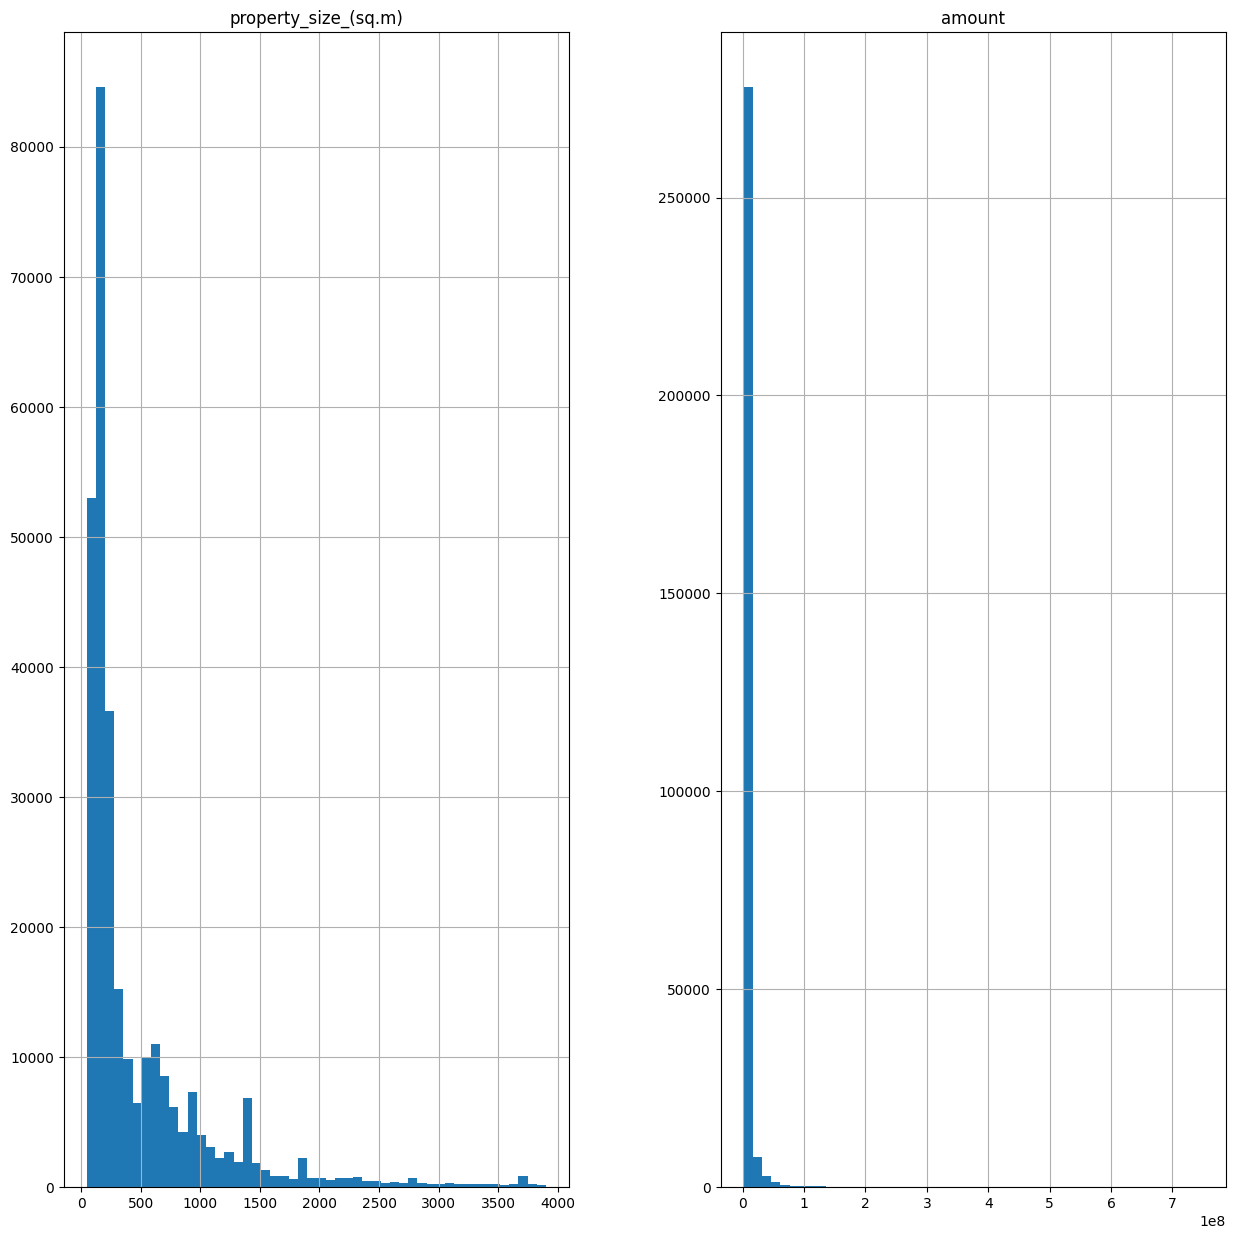

In [92]:
sales_df.hist(bins=50, figsize=(15,15))
plt.show()

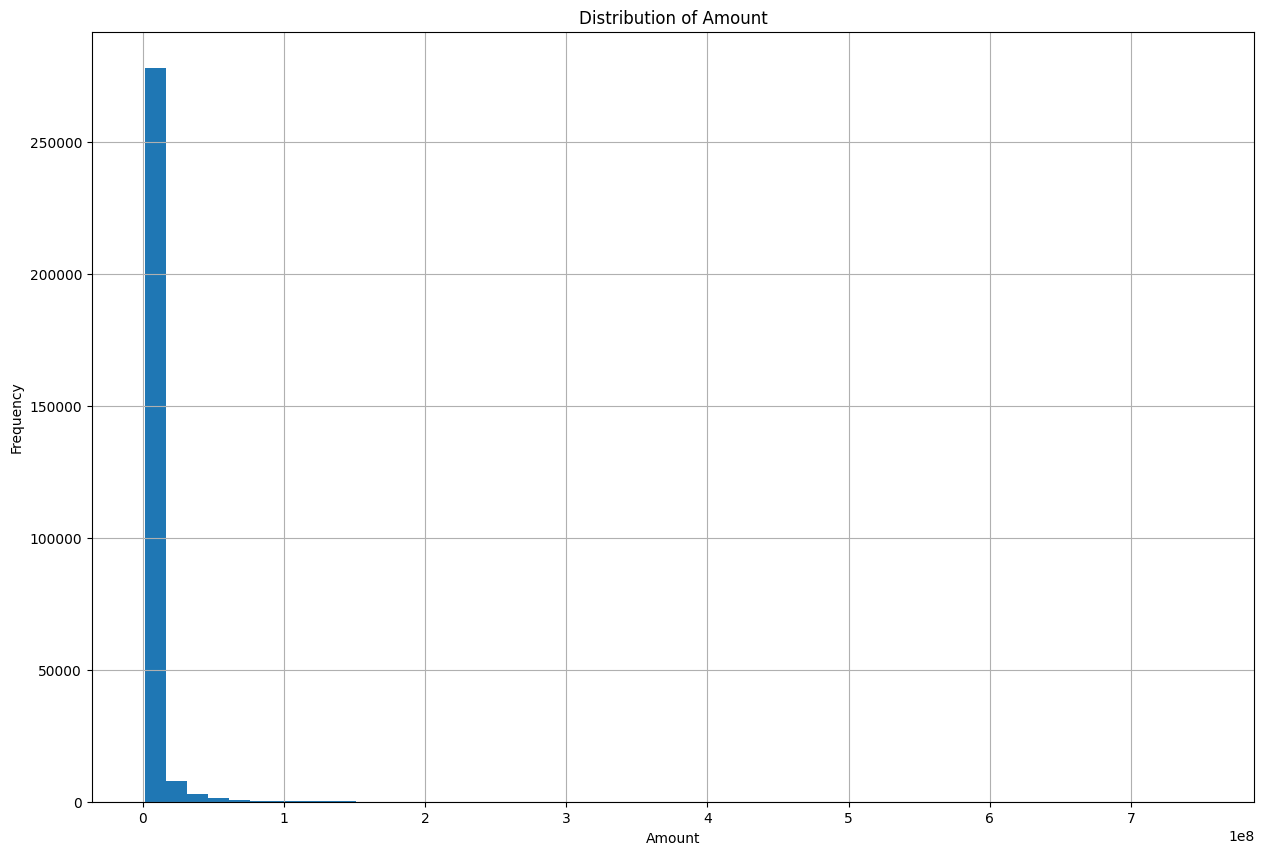

In [93]:
import matplotlib.pyplot as plt

# Plot the histogram for the 'amount' column to visualize the distribution
sales_df['amount'].hist(bins=50, figsize=(15, 10))
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


Based on the histogram above, here are some observations and suggestions for further data exploration:

### Observations:
 1. High Frequency at Low Values: The histogram shows a very high frequency of sales at the lower end of the 'Amount' scale, particularly around 0 to 1. This suggests that most of your sales are of smaller amounts.
 2. Skewed Distribution: The distribution is heavily skewed to the right, indicating that while there are many small transactions, there are very few transactions with higher amounts. This is typical in sales data where most purchases are of lower value, with occasional high-value purchases.
 3. Long Tail: There are some transactions that extend into higher amounts, but they are very rare as indicated by the low frequency in those bins.

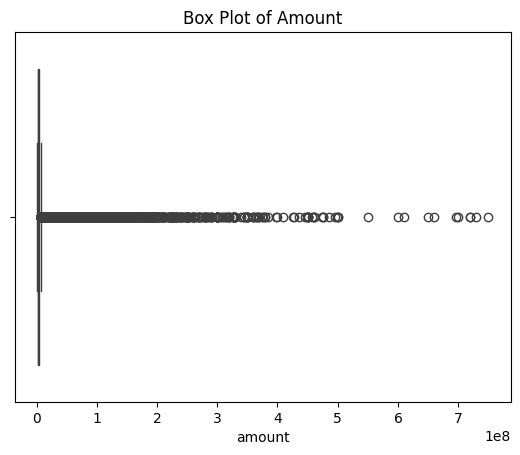

In [94]:

sns.boxplot(x=sales_df['amount'])
plt.title('Box Plot of Amount')
plt.show()

In [95]:
# Define a function to detect outliers based on IQR
def find_outliers_iqr(sales_df, column):
    Q1 = sales_df[column].quantile(0.25)
    Q3 = sales_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return sales_df[(sales_df[column] < lower_bound) | (sales_df[column] > upper_bound)]

#Find outliers for 'portfolio_return'
outliers = find_outliers_iqr(sales_df, 'amount')
print(outliers)

       property_type    room(s)             nearest_landmark  \
12              Land     Office         IMG World Adventures   
14              Land        GYM         IMG World Adventures   
21              Land  PENTHOUSE         IMG World Adventures   
22              Land     Office         IMG World Adventures   
40              Land     Office               Downtown Dubai   
...              ...        ...                          ...   
292023          Land        GYM  Dubai International Airport   
292025          Land       Shop  Dubai International Airport   
292030          Land      Hotel  Dubai International Airport   
292033          Land  PENTHOUSE  Dubai International Airport   
292034          Land     Office  Dubai International Airport   

                nearest_mall                       nearest_metro  \
12      Mall of the Emirates  First Abu Dhabi Bank Metro Station   
14      Mall of the Emirates  First Abu Dhabi Bank Metro Station   
21      Mall of the Emirate

In [96]:
# Remove outliers from 'portfolio_return' column based on IQR method
def remove_outliers_iqr(sales_df, column):
    Q1 = sales_df[column].quantile(0.25)
    Q3 = sales_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return sales_df[(sales_df[column] >= lower_bound) & (sales_df[column] <= upper_bound)]

# Apply the function to remove outliers from the 'portfolio_return' column
df_clean = remove_outliers_iqr(sales_df, 'amount')

# Verify the result
print(df_clean)

       property_type room(s)              nearest_landmark  \
0               Unit   2 B/R                  Burj Al Arab   
1               Unit   3 B/R                  Burj Khalifa   
2           Building   4 B/R                Expo 2020 Site   
3               Unit   2 B/R  Sports City Swimming Academy   
4               Land     GYM   Dubai International Airport   
...              ...     ...                           ...   
292031          Land  Office   Dubai International Airport   
292032          Land   Hotel   Dubai International Airport   
292035          Land     GYM   Dubai International Airport   
292036          Land   Hotel   Dubai International Airport   
292037          Land     GYM   Dubai International Airport   

              nearest_mall               nearest_metro  property_size_(sq.m)  \
0              Marina Mall               Palm Jumeirah                167.94   
1               Dubai Mall            Financial Centre                160.49   
2       Ibn-e-B

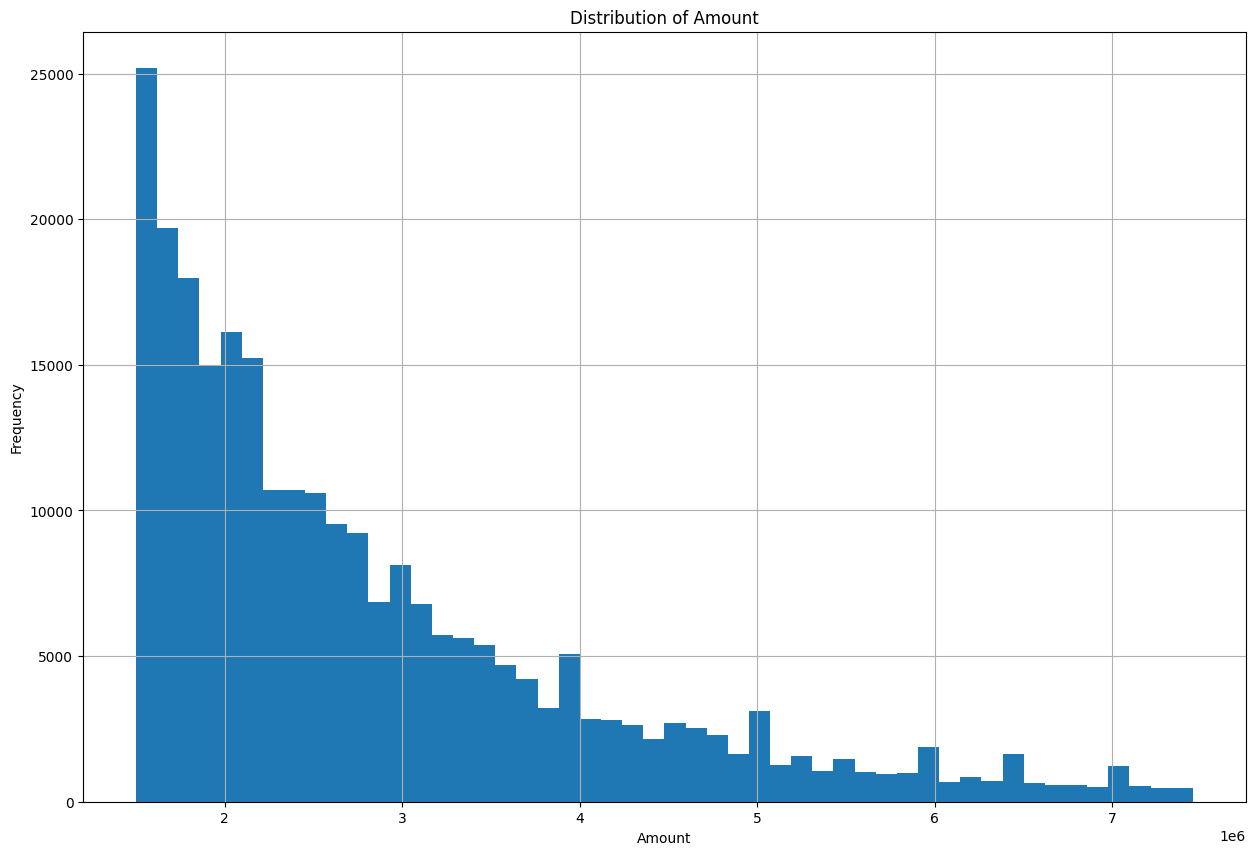

In [97]:
# Plot the histogram for the 'amount' column to visualize the distribution
df_clean['amount'].hist(bins=50, figsize=(15, 10))
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [98]:
correlation_cleaned = df_clean.select_dtypes(include='number').corr()['amount'].sort_values()
print(correlation_cleaned)


property_size_(sq.m)    0.379644
amount                  1.000000
Name: amount, dtype: float64


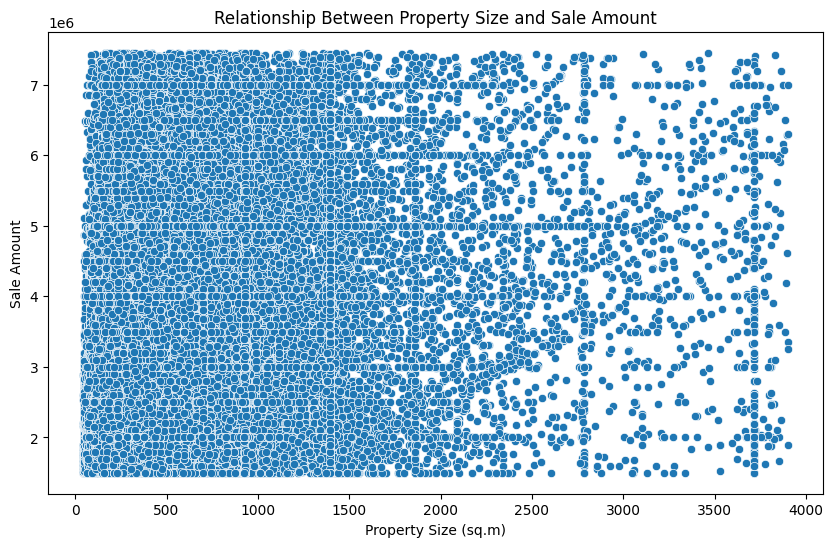

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='property_size_(sq.m)', y='amount')
plt.title('Relationship Between Property Size and Sale Amount')
plt.xlabel('Property Size (sq.m)')
plt.ylabel('Sale Amount')
plt.show()

The scatter plot you've generated provides a visual representation of the relationship between property size (in square meters) and the sale amount. Here's an analysis based on the plot:

### Observations:
 1. Positive Trend: There is a visible positive trend where larger properties tend to have higher sale amounts, which aligns with the correlation coefficient of 0.376137 you found earlier. However, the relationship isn't perfectly linear, as expected in real estate where many factors influence price.
 2. Density: There's a high density of data points at the lower end of both property size and sale amount, suggesting that smaller, less expensive properties are more common in your dataset.
 3. Spread: As property size increases, there's more variability in sale amounts. This spread indicates that while larger properties generally cost more, other factors significantly affect the price, leading to a wider range of sale amounts for similar sized properties.
 4. Outliers: Although you've cleaned the data for outliers, there are still some points that might be considered outliers, especially at the higher end of property size with relatively lower sale amounts. These could be properties with unique characteristics or located in less desirable areas.
 

In [100]:
df_clean.dtypes

property_type           category
room(s)                 category
nearest_landmark        category
nearest_mall            category
nearest_metro           category
property_size_(sq.m)     float64
usage                   category
amount                     int64
area                    category
dtype: object

In [101]:
for col in df_clean.columns:
    print(col)
    print(df_clean[col].unique()[:5])
    print(df_clean[col].nunique())
    print()

df_clean


property_type
['Unit', 'Building', 'Land']
Categories (3, object): ['Building', 'Land', 'Unit']
3

room(s)
['2 B/R', '3 B/R', '4 B/R', 'GYM', '1 B/R']
Categories (16, object): ['1 B/R', '2 B/R', '3 B/R', '4 B/R', ..., 'Shop', 'Single Room', 'Store Room', 'Studio']
13

nearest_landmark
['Burj Al Arab', 'Burj Khalifa', 'Expo 2020 Site', 'Sports City Swimming Academy', 'Dubai International Airport']
Categories (12, object): [' B2-556', '1214', 'Burj Al Arab', 'Burj Khalifa', ..., 'IMG World Adventures', 'Jabel Ali', 'Motor City', 'Sports City Swimming Academy']
9

nearest_mall
['Marina Mall', 'Dubai Mall', 'Ibn-e-Battuta Mall', 'City Centre Mirdif', 'Mall of the Emirates']
Categories (7, object): [' B2-555', '3165', 'City Centre Mirdif', 'Dubai Mall', 'Ibn-e-Battuta Mall', 'Mall of the Emirates', 'Marina Mall']
5

nearest_metro
['Palm Jumeirah', 'Financial Centre', 'Ibn Battuta Metro Station', 'Nakheel Metro Station', 'Rashidiya Metro Station']
Categories (58, object): [' B2-554', '1072',

,property_type,room(s),nearest_landmark,nearest_mall,nearest_metro,property_size_(sq.m),usage,amount,area
0,Unit,2 B/R,Burj Al Arab,Marina Mall,Palm Jumeirah,167.94,Residential,1900000,PALM JUMEIRAH
1,Unit,3 B/R,Burj Khalifa,Dubai Mall,Financial Centre,160.49,Residential,3500000,Zaabeel Second
2,Building,4 B/R,Expo 2020 Site,Ibn-e-Battuta Mall,Ibn Battuta Metro Station,784.50,Residential,2000000,DUBAI INVESTMENT PARK FIRST
3,Unit,2 B/R,Sports City Swimming Academy,Marina Mall,Nakheel Metro Station,258.12,Residential,3056216,JUMEIRAH VILLAGE CIRCLE
4,Land,GYM,Dubai International Airport,City Centre Mirdif,Rashidiya Metro Station,334.45,Residential,1600000,Al Rashidiya
...,...,...,...,...,...,...,...,...,...
292031,Land,Office,Dubai International Airport,Dubai Mall,Salah Al Din Metro Station,634.06,Residential,5971875,Al Baraha
292032,Land,Hotel,Dubai International Airport,Dubai Mall,Al Ras Metro Station,100.71,Commercial,2500000,Al Suq Al Kabeer
292035,Land,GYM,Dubai International Airport,Dubai Mall,Burjuman Metro Station,1068.38,Commercial,4800000,Al Karama
292036,Land,Hotel,Dubai International Airport,Dubai Mall,Burjuman Metro Station,415.93,Commercial,4500000,Al Hamriya


##### Distribution of Price

##### The chart had a long tail and this would affect our model, so we removed long tail using the np.log1p() function.

##### np.log1p() -> apply log transformation to a variable, after adding one to each input value.

<Axes: xlabel='amount', ylabel='Count'>

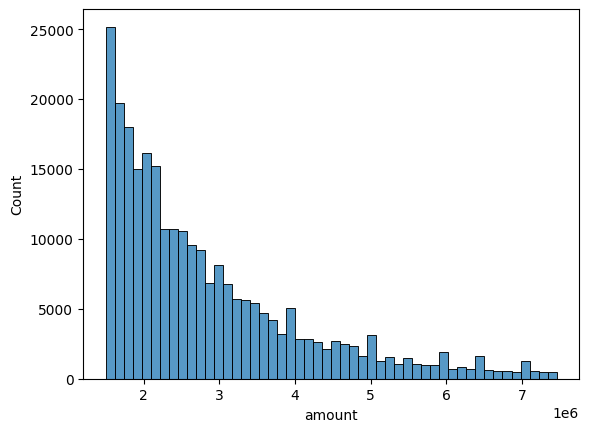

In [102]:
sns.histplot(df_clean.amount, bins=50)

<Axes: xlabel='amount', ylabel='Count'>

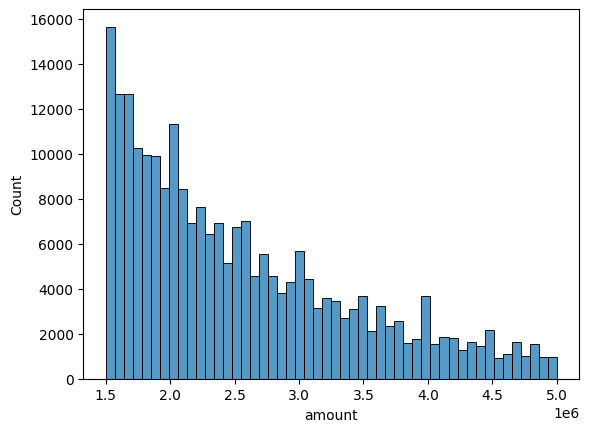

In [103]:
sns.histplot(df_clean.amount[df_clean.amount < 5000000], bins=50)

In [104]:
np.log1p([1, 1, 10, 1000, 100000])

array([ 0.69314718,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [105]:
amount_logs = np.log1p(df_clean.amount)

<Axes: xlabel='amount', ylabel='Count'>

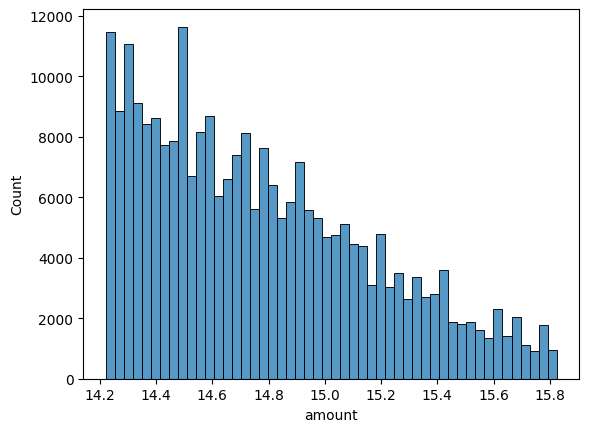

In [106]:
sns.histplot(amount_logs, bins=50)

In [107]:
df_clean.isnull().sum()

property_type           0
room(s)                 0
nearest_landmark        0
nearest_mall            0
nearest_metro           0
property_size_(sq.m)    0
usage                   0
amount                  0
area                    0
dtype: int64